# Introduction to Pandas for Data Analysis

Welcome to this tutorial on Pandas, one of the most powerful and widely used data manipulation libraries in Python.

## What is Pandas?

Pandas is a fast, flexible, and expressive library for data manipulation and analysis. It's particularly well-suited for structured data like spreadsheets or SQL tables.

## Key Features:

- DataFrames for 2D data structures
- Series for 1D data structures
- Efficient data alignment and integrated handling of missing data
- Powerful group by functionality for aggregating and transforming data
- Robust time series functionality

Let's dive into some common functions and their industry applications.

# 0. Prerequisites

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Reading data

## 1.1 CSV files

In [2]:
df = pd.read_csv(
    'data/airbnb_listings_sample.csv',
    low_memory=False # Allows pandas to use more RAM for larger data
)
df.head(5) # Show first 5 rows

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,45297006,10 min from the GIG. 10min do Aeroporto e da UFRJ,115834913,2017-02-10,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,1.0,1.0,f,1.0,...,1,365,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t
1,37927802,Apartamento rock in rio,64889942,2016-03-29,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,NaN,NaN,f,1.0,...,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
2,41414052,Venezia Mega Residence,50308557,2015-12-01,"Istanbul, Istanbul, Turkey",NaN,NaN,NaN,f,0.0,...,3,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
3,26727492,Cosy room - in Petersham's hip Inner West,200973153,2018-07-09,AU,NaN,NaN,NaN,f,1.0,...,2,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,134934,Prime Williamsburg Apartment,652842,2011-06-01,"New York, New York, United States",within a few hours,1.0,NaN,f,1.0,...,5,1125,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f


In [3]:
# Display data dimensions

df.shape

(50000, 33)

# 2. Data overview

## 2.0 Basic operations

### View all columns

In [4]:
# View columns

df.columns

Index(['listing_id', 'name', 'host_id', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'district', 'city', 'latitude', 'longitude', 'property_type',
       'room_type', 'accommodates', 'bedrooms', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable'],
      dtype='object')

### View a single column (Series)

In [5]:
# View a single column aka a Series

print(type(df['name']))

df['name']

<class 'pandas.core.series.Series'>


0        10 min from the GIG. 10min do Aeroporto e da UFRJ
1                                  Apartamento rock in rio
2                                   Venezia Mega Residence
3                Cosy room - in Petersham's hip Inner West
4                             Prime Williamsburg Apartment
                               ...                        
49995    Comfortable 3bdr apartment, Appio Latino 82844...
49996                        White Forest Room, Trastevere
49997                                                    3
49998    #215 TIR8 - Lindo Estudio no melhor ponto de C...
49999                    Lumineux appt proche du Trocadero
Name: name, Length: 50000, dtype: object

### View multiple columns

In [6]:
# View multiple columns

df[['listing_id', 'name', 'price']]

,listing_id,name,price
0,45297006,10 min from the GIG. 10min do Aeroporto e da UFRJ,53
1,37927802,Apartamento rock in rio,1500
2,41414052,Venezia Mega Residence,445
3,26727492,Cosy room - in Petersham's hip Inner West,42
4,134934,Prime Williamsburg Apartment,300
...,...,...,...
49995,34270165,"Comfortable 3bdr apartment, Appio Latino 82844...",28
49996,14282459,"White Forest Room, Trastevere",33
49997,40210870,3,1000
49998,45546385,#215 TIR8 - Lindo Estudio no melhor ponto de C...,233


In [7]:
column_to_view = ['name', 'price']

df[column_to_view]

,name,price
0,10 min from the GIG. 10min do Aeroporto e da UFRJ,53
1,Apartamento rock in rio,1500
2,Venezia Mega Residence,445
3,Cosy room - in Petersham's hip Inner West,42
4,Prime Williamsburg Apartment,300
...,...,...
49995,"Comfortable 3bdr apartment, Appio Latino 82844...",28
49996,"White Forest Room, Trastevere",33
49997,3,1000
49998,#215 TIR8 - Lindo Estudio no melhor ponto de C...,233


### View by using iloc[row, col]

In [8]:
some_string = 'apples'

some_string[:]


'apples'

In [9]:
# View by using iloc[row,col]
# Need to pass numerical index

df.iloc[1:3,1:3]

,name,host_id
1,Apartamento rock in rio,64889942
2,Venezia Mega Residence,50308557


### View by using loc[row, col]

In [10]:
data = {
    'a': [1,2,3],
    'b': [4,5,6]
}

data_df = pd.DataFrame(data, index=['x', 'y', 'z'])
data_df

data_df.loc[['y', 'z'],['a', 'b']]

,a,b
y,2,5
z,3,6


In [11]:
# View by using loc[row,col]
# Need to use name instead of index

df.loc[10:20, ['host_id', 'name', 'longitude', 'latitude', 'price']]

,host_id,name,longitude,latitude,price
10,183323456,glicini apartments,12.57130,41.87829,37
11,101553118,Cozy room in a condo with pool near the beach.,-43.49109,-23.02238,250
12,34813219,Cosy Home for Family and Big Group æ‚‰å°¼èˆ’é€...,150.98080,-33.79050,300
13,198685892,CONDESA SUITES,-99.17426,19.41515,1100
14,45788344,METROPOLITAN HOTEL BOSPHORUS DELUXE ROOM,28.98785,41.03137,1391
15,27580462,STUDIO de 24M2 Monceau PARIS 17Ã¨m,2.30988,48.88208,45
16,29228078,Central Spacious En Suite Bedroom,18.41058,-33.93233,546
17,47835311,Quartos excelentes!,-43.47575,-23.01067,100
18,10904277,â˜€ï¸ Beach Access | Sea view | Parking | Kit...,-43.34100,-23.00521,235
19,138517384,Metro luxe kasetsart,100.63363,13.80863,1000


### View based on condition

In [12]:
df['price'].head(10)

0      53
1    1500
2     445
3      42
4     300
5     149
6    2500
7      89
8     516
9     700
Name: price, dtype: int64

In [13]:
# Let's try to only view units with price > 500
filter = df['price'] > 500
filter.head(10)

0    False
1     True
2    False
3    False
4    False
5    False
6     True
7    False
8     True
9     True
Name: price, dtype: bool

In [14]:
df[filter]


,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
1,37927802,Apartamento rock in rio,64889942,2016-03-29,"Rio de Janeiro, State of Rio de Janeiro, Brazil",NaN,NaN,NaN,f,1.0,...,2,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
6,31278744,Noble Revolve Ratchada Bangkok,109932669,2017-01-05,"Bangkok, Thailand",NaN,NaN,NaN,f,2.0,...,30,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
8,46391978,One bed room apartment,11695326,2014-01-27,"London, England, United Kingdom",within an hour,1.00,0.33,f,0.0,...,2,365,100.0,10.0,10.0,8.0,10.0,10.0,10.0,f
9,18279821,Byron's Lookout,126395453,2017-04-18,ZA,within a day,1.00,0.50,f,1.0,...,1,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
13,31410452,CONDESA SUITES,198685892,2018-06-28,MX,within an hour,1.00,1.00,t,3.0,...,3,1125,97.0,10.0,10.0,10.0,9.0,10.0,10.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49981,46384889,Comfortable 3 Bedroom Home In Secure Estate,101775614,2016-10-30,ZA,NaN,NaN,NaN,f,1.0,...,7,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
49984,10780464,Downtown Sukhumvit near ThongLor BTS-free shuttle,33441839,2015-05-15,"Houston, Texas, United States",within a day,1.00,1.00,f,1.0,...,3,1125,94.0,9.0,10.0,10.0,9.0,9.0,9.0,t
49988,44118322,Casai Polanco | 2BR | 2BA | Yucatec | Luxury Flat,236301634,2019-01-13,"Mexico City, Mexico City, Mexico",within an hour,0.99,0.98,t,71.0,...,1,365,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f
49992,34814013,A perfect house for 6 people and perfect locat...,258498916,2019-04-28,"Istanbul, Istanbul, Turkey",NaN,NaN,1.00,f,2.0,...,1,1125,96.0,10.0,10.0,10.0,10.0,10.0,10.0,t


In [15]:
# one-liner

df[df['price']<500]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,45297006,10 min from the GIG. 10min do Aeroporto e da UFRJ,115834913,2017-02-10,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within an hour,1.00,1.00,f,1.0,...,1,365,100.0,10.0,9.0,10.0,10.0,10.0,10.0,t
2,41414052,Venezia Mega Residence,50308557,2015-12-01,"Istanbul, Istanbul, Turkey",NaN,NaN,NaN,f,0.0,...,3,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
3,26727492,Cosy room - in Petersham's hip Inner West,200973153,2018-07-09,AU,NaN,NaN,NaN,f,1.0,...,2,1125,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,134934,Prime Williamsburg Apartment,652842,2011-06-01,"New York, New York, United States",within a few hours,1.00,NaN,f,1.0,...,5,1125,92.0,9.0,9.0,10.0,10.0,10.0,9.0,f
5,40160578,"new apartment close to LGA,JFK,Manhattan",15912749,2014-05-24,"New York, New York, United States",within an hour,1.00,1.00,f,0.0,...,1,1125,95.0,10.0,10.0,10.0,10.0,9.0,9.0,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,27590667,"KÃœÃ‡ÃœK, ÅžÄ°RÄ°N BAHÃ‡ELÄ° EV FATÄ°Hâ€™TE",208088163,2018-08-07,TR,NaN,NaN,NaN,f,2.0,...,1,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
49995,34270165,"Comfortable 3bdr apartment, Appio Latino 82844...",5056483,2013-02-12,Head of Innovation & Revenue,within an hour,0.98,0.97,f,696.0,...,1,1125,85.0,9.0,10.0,10.0,10.0,10.0,9.0,t
49996,14282459,"White Forest Room, Trastevere",78822571,2016-06-20,"Rome, Lazio, Italy",within an hour,1.00,1.00,t,4.0,...,2,45,95.0,10.0,9.0,10.0,10.0,10.0,10.0,f
49998,45546385,#215 TIR8 - Lindo Estudio no melhor ponto de C...,366913236,2020-09-10,BR,within an hour,1.00,1.00,f,7.0,...,1,365,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t


In [16]:
# Multiple conditions, (price > 500) AND (price <= 550)
# AND = &
# OR = |

filter1 = df['price'] > 500
filter2 = df['price'] <= 550 # 501-550

df[filter1 & filter2]

# one-liner

df[(df['price']>500) & (df['price']<=550)]

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
8,46391978,One bed room apartment,11695326,2014-01-27,"London, England, United Kingdom",within an hour,1.00,0.33,f,0.0,...,2,365,100.0,10.0,10.0,8.0,10.0,10.0,10.0,f
16,5639916,Central Spacious En Suite Bedroom,29228078,2015-03-12,"Cape Town, Western Cape, South Africa",NaN,NaN,0.50,f,1.0,...,3,60,94.0,10.0,10.0,10.0,10.0,10.0,10.0,f
66,46619654,Boho apartment in la del Valle,165416965,2018-01-02,"Mexico City, Mexico City, Mexico",within an hour,1.00,NaN,f,1.0,...,1,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
71,46298133,Vem ser feliz,312100268,2019-11-25,"Rio de Janeiro, State of Rio de Janeiro, Brazil",within a day,0.50,1.00,f,0.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t
257,27395812,Cihangir Apartment - Best View in Istanbul!,4375413,2012-12-10,"Istanbul, Istanbul, Turkey",a few days or more,0.33,0.14,f,1.0,...,2,60,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49627,24042636,â˜…Hermosa habitacion Vintage a 15 min del Cen...,38075757,2015-07-10,"Mexico City, Federal District, Mexico",NaN,NaN,1.00,f,1.0,...,1,15,97.0,10.0,10.0,10.0,10.0,10.0,10.0,t
49758,2647654,NEVÄ°ZADE'DE YENÄ°LENMÄ°Åž ULTRA LUX 7,4406078,2012-12-14,Istanbul,NaN,NaN,NaN,f,8.0,...,1,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
49866,2746315,WORLDCUP 2014 AVAILABLE RJ!!!,14034662,2014-04-08,"Rio, Rio de Janeiro, Brazil",NaN,NaN,NaN,f,1.0,...,7,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f
49896,47796151,Exclusive for 8 people very close to the center,385234044,2021-01-19,FR,a few days or more,0.33,NaN,f,0.0,...,5,1125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f


### Updating values

In [17]:
df.iloc[0, 1] = 'some_new_value'

In [18]:
# Updating a specific value

temp_name = df.iloc[0,1]

df.iloc[0,1] = '-1'

display(df.iloc[0, :5])

df.iloc[0,1] = temp_name

listing_id                                              45297006
name                                                          -1
host_id                                                115834913
host_since                                            2017-02-10
host_location    Rio de Janeiro, State of Rio de Janeiro, Brazil
Name: 0, dtype: object

### Updating row

In [19]:
df.shape

(50000, 33)

In [20]:
row = [-1 for i in range(df.shape[1])]
row

[-1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1,
 -1]

In [21]:
row = [-1 for i in range(df.shape[1])]

temp_row = df.loc[0]

df.loc[0] = row

display(df.loc[0])

df.loc[0] = temp_row

listing_id                      -1
name                            -1
host_id                         -1
host_since                      -1
host_location                   -1
host_response_time              -1
host_response_rate            -1.0
host_acceptance_rate          -1.0
host_is_superhost               -1
host_total_listings_count     -1.0
host_has_profile_pic            -1
host_identity_verified          -1
neighbourhood                   -1
district                        -1
city                            -1
latitude                      -1.0
longitude                     -1.0
property_type                   -1
room_type                       -1
accommodates                    -1
bedrooms                      -1.0
amenities                       -1
price                           -1
minimum_nights                  -1
maximum_nights                  -1
review_scores_rating          -1.0
review_scores_accuracy        -1.0
review_scores_cleanliness     -1.0
review_scores_checki

### Updating column

In [22]:
col = ['some_city_name_here' for i in range(df.shape[0])]

temp_col = df['city']

df['city'] = col

display(df[['name', 'city']])

df['city'] = temp_col

,name,city
0,some_new_value,some_city_name_here
1,Apartamento rock in rio,some_city_name_here
2,Venezia Mega Residence,some_city_name_here
3,Cosy room - in Petersham's hip Inner West,some_city_name_here
4,Prime Williamsburg Apartment,some_city_name_here
...,...,...
49995,"Comfortable 3bdr apartment, Appio Latino 82844...",some_city_name_here
49996,"White Forest Room, Trastevere",some_city_name_here
49997,3,some_city_name_here
49998,#215 TIR8 - Lindo Estudio no melhor ponto de C...,some_city_name_here


### Adding a new derived column

In [23]:
df.dtypes

listing_id                       int64
name                            object
host_id                          int64
host_since                      object
host_location                   object
host_response_time              object
host_response_rate             float64
host_acceptance_rate           float64
host_is_superhost               object
host_total_listings_count      float64
host_has_profile_pic            object
host_identity_verified          object
neighbourhood                   object
district                        object
city                            object
latitude                       float64
longitude                      float64
property_type                   object
room_type                       object
accommodates                     int64
bedrooms                       float64
amenities                       object
price                            int64
minimum_nights                   int64
maximum_nights                   int64
review_scores_rating     

In [24]:
# Say we want to calculate the average price per room for each unit
# price_per_room = price_per_night / no_of_rooms

df['price_per_room'] = df['price'] / df['bedrooms']

df[['name', 'price', 'bedrooms', 'price_per_room']]

,name,price,bedrooms,price_per_room
0,some_new_value,53,1.0,53.000000
1,Apartamento rock in rio,1500,2.0,750.000000
2,Venezia Mega Residence,445,2.0,222.500000
3,Cosy room - in Petersham's hip Inner West,42,1.0,42.000000
4,Prime Williamsburg Apartment,300,1.0,300.000000
...,...,...,...,...
49995,"Comfortable 3bdr apartment, Appio Latino 82844...",28,3.0,9.333333
49996,"White Forest Room, Trastevere",33,1.0,33.000000
49997,3,1000,1.0,1000.000000
49998,#215 TIR8 - Lindo Estudio no melhor ponto de C...,233,1.0,233.000000


### Iterating throught a DataFrame (NOT RECOMMENDED)

In [25]:
for row in df.iterrows():
    print(row)

    if row[0] >= 5:
        break



(0, listing_id                                                              45297006
name                                                              some_new_value
host_id                                                                115834913
host_since                                                            2017-02-10
host_location                    Rio de Janeiro, State of Rio de Janeiro, Brazil
host_response_time                                                within an hour
host_response_rate                                                           1.0
host_acceptance_rate                                                         1.0
host_is_superhost                                                              f
host_total_listings_count                                                    1.0
host_has_profile_pic                                                           t
host_identity_verified                                                         t
neighbourhood           

## 2.1 Joins

In [26]:
left = {
    'id': [1, 2, 3, 4, 5],
    'value': ['a', 'b', 'c', 'd', 'e'],
    'a': ['a', 'b', 'c', 'd', 'e']
}

right = {
    'id': [3, 4, 5, 6, 7],
    'value': ['f', 'g', 'h', 'i', 'j'],
    'b': ['a', 'b', 'c', 'd', 'e']
}

df1 = pd.DataFrame(left)
df2 = pd.DataFrame(right)

df_joined = pd.merge(df1, df2, on='id', how='outer', suffixes=('_from_left', '_from_right'))
df_joined

,id,value_from_left,a,value_from_right,b
0,1,a,a,NaN,NaN
1,2,b,b,NaN,NaN
2,3,c,c,f,a
3,4,d,d,g,b
4,5,e,e,h,c
5,6,NaN,NaN,i,d
6,7,NaN,NaN,j,e


In [27]:
left = {
    'id': [1, 2, 3, 4, 5],
    'value': ['a', 'b', 'c', 'd', 'e'],
    'a': ['a', 'b', 'c', 'd', 'e']
}
df1 = pd.DataFrame(left)
df1

,id,value,a
0,1,a,a
1,2,b,b
2,3,c,c
3,4,d,d
4,5,e,e


In [28]:
right = {
    'id': [3, 4, 5, 6, 7],
    'value': ['f', 'g', 'h', 'i', 'j'],
    'b': ['a', 'b', 'c', 'd', 'e']
}
df2 = pd.DataFrame(right)
df2

,id,value,b
0,3,f,a
1,4,g,b
2,5,h,c
3,6,i,d
4,7,j,e


## 2.1 Data Analysis

Possible analysis that can be done:

- Price analysis:
    - Calculate average, median, and range of prices
    - Compare prices across different cities, neighborhoods, or property types
    - Identify factors that correlate most strongly with price


- Host performance:
    - Analyze the relationship between superhost status and review scores
    - Compare response rates and acceptance rates of superhosts vs regular hosts
    - Examine how a host's total listing count relates to their performance metrics


- Geographical insights:
    - Create a heatmap of listing densities using latitude and longitude
    - Analyze price variations across different neighborhoods or districts
    - Identify the most popular areas for specific property types


- Review score analysis:
    - Calculate average scores for different aspects (cleanliness, location, etc.)
    - Identify factors that correlate with high overall ratings
    - Compare review scores across different property types or room types


- Booking patterns:
    - Analyze the relationship between minimum/maximum nights and other factors
    - Examine how instant bookable status affects pricing or review scores


- Amenities analysis:
    - Identify the most common amenities
    - Analyze how certain amenities affect pricing or review scores


- Time-based analysis:
    - If the 'host_since' column contains dates, you could analyze how host experience relates to performance metrics


- Property type insights:
    - Compare different metrics across property types (price, review scores, etc.)
    - Analyze the distribution of property types in different cities or neighborhoods

In [29]:
# Helper function

def summary(series: pd.Series, bins: int = 20):

    fig, axes = plt.subplots(1,2, figsize=(11,5))
    
    series.plot(kind='box', ax=axes[0])
    series.plot(kind='hist', bins=bins, ax=axes[1])
    
    display(series.describe())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   50000 non-null  int64  
 1   name                         49974 non-null  object 
 2   host_id                      50000 non-null  int64  
 3   host_since                   49970 non-null  object 
 4   host_location                49850 non-null  object 
 5   host_response_time           27188 non-null  object 
 6   host_response_rate           27188 non-null  float64
 7   host_acceptance_rate         29936 non-null  float64
 8   host_is_superhost            49970 non-null  object 
 9   host_total_listings_count    49970 non-null  float64
 10  host_has_profile_pic         49970 non-null  object 
 11  host_identity_verified       49970 non-null  object 
 12  neighbourhood                50000 non-null  object 
 13  district        

In [31]:
df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,price_per_room
count,5.000000e+04,5.000000e+04,27188.000000,29936.000000,49970.000000,50000.000000,50000.000000,50000.000000,44694.000000,50000.000000,50000.000000,5.000000e+04,33551.000000,33480.000000,33488.00000,33475.000000,33491.000000,33476.000000,33476.000000,44694.000000
mean,2.630519e+07,1.076507e+08,0.865016,0.828308,26.144547,18.795376,12.348247,3.301860,1.521368,615.104480,7.906400,1.295926e+03,93.349438,9.566308,9.31250,9.705631,9.700964,9.635560,9.332537,388.560478
std,1.443735e+07,1.106279e+08,0.284162,0.288273,297.406617,32.543998,72.998288,2.161655,1.178165,3276.369472,24.740944,9.999635e+04,10.056791,0.985373,1.14072,0.845460,0.870473,0.821115,1.040655,1843.412405
min,5.121000e+03,1.944000e+03,0.000000,0.000000,0.000000,-34.244380,-99.319470,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,0.960000
25%,1.375552e+07,1.721470e+07,0.900000,0.790000,1.000000,-22.964382,-43.198320,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.00000,10.000000,10.000000,9.000000,9.000000,65.000000
50%,2.749757e+07,5.775332e+07,1.000000,0.980000,1.000000,40.710845,2.382655,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,120.000000
75%,3.974938e+07,1.810488e+08,1.000000,1.000000,4.000000,41.908143,28.985925,4.000000,2.000000,471.000000,5.000000,1.125000e+03,100.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,350.000000
max,4.833904e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.901290,151.339770,16.000000,50.000000,300000.000000,1125.000000,2.000000e+07,100.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,179532.000000


### 2.1.1 Price analysis:
- Calculate average, median, and range of prices
- Compare prices across different cities, neighborhoods, or property types
- Identify factors that correlate most strongly with price

In [32]:
df['price'].describe()

count     50000.000000
mean        615.104480
std        3276.369472
min           0.000000
25%          75.000000
50%         150.000000
75%         471.000000
max      300000.000000
Name: price, dtype: float64

In [33]:
df['city'].value_counts()

city
Paris             11517
New York           6613
Sydney             5982
Rome               5028
Rio de Janeiro     4775
Istanbul           4384
Mexico City        3616
Bangkok            3417
Cape Town          3410
Hong Kong          1258
Name: count, dtype: int64

In [34]:
a = df.groupby('city')['price'].mean()
a

city
Bangkok           2033.091016
Cape Town         2556.163636
Hong Kong          797.650238
Istanbul           551.845347
Mexico City       1151.812500
New York           141.939059
Paris              114.625597
Rio de Janeiro     706.022827
Rome               111.974145
Sydney             219.139920
Name: price, dtype: float64

In [35]:
cols = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_total_listings_count',
    'bedrooms',
    'price',
    'review_scores_rating',
    'review_scores_cleanliness'
]

df[cols]

,host_response_rate,host_acceptance_rate,host_total_listings_count,bedrooms,price,review_scores_rating,review_scores_cleanliness
0,1.00,1.00,1.0,1.0,53,100.0,9.0
1,NaN,NaN,1.0,2.0,1500,NaN,NaN
2,NaN,NaN,0.0,2.0,445,NaN,NaN
3,NaN,NaN,1.0,1.0,42,99.0,10.0
4,1.00,NaN,1.0,1.0,300,92.0,9.0
...,...,...,...,...,...,...,...
49995,0.98,0.97,696.0,3.0,28,85.0,10.0
49996,1.00,1.00,4.0,1.0,33,95.0,9.0
49997,NaN,0.89,4.0,1.0,1000,100.0,10.0
49998,1.00,1.00,7.0,1.0,233,100.0,10.0


In [36]:
df[cols].corr()

,host_response_rate,host_acceptance_rate,host_total_listings_count,bedrooms,price,review_scores_rating,review_scores_cleanliness
host_response_rate,1.000000,0.326849,0.039150,0.002222,0.001828,0.100155,0.105607
host_acceptance_rate,0.326849,1.000000,0.034795,-0.043748,-0.048971,-0.023649,0.024264
host_total_listings_count,0.039150,0.034795,1.000000,-0.011012,0.012777,-0.055917,-0.031719
bedrooms,0.002222,-0.043748,-0.011012,1.000000,0.161379,0.012766,0.000559
price,0.001828,-0.048971,0.012777,0.161379,1.000000,0.001760,0.011936
review_scores_rating,0.100155,-0.023649,-0.055917,0.012766,0.001760,1.000000,0.749686
review_scores_cleanliness,0.105607,0.024264,-0.031719,0.000559,0.011936,0.749686,1.000000


<Axes: >

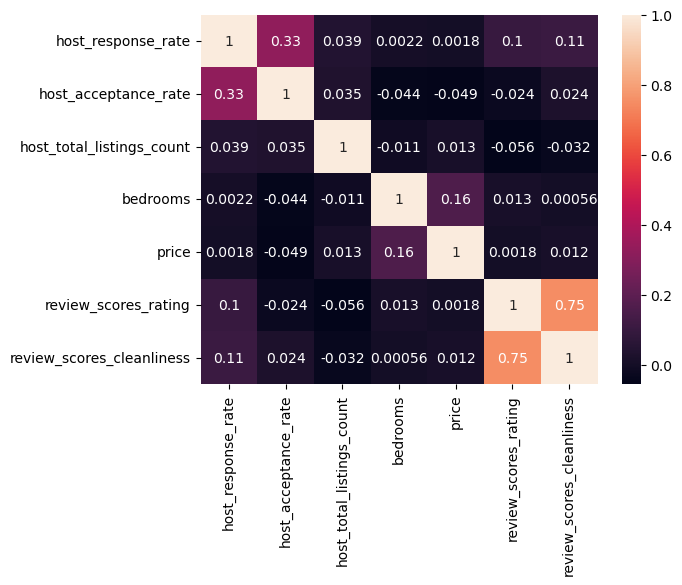

In [37]:
sns.heatmap(df[cols].corr(), annot=True)

count     50000.000000
mean        615.104480
std        3276.369472
min           0.000000
25%          75.000000
50%         150.000000
75%         471.000000
max      300000.000000
Name: price, dtype: float64

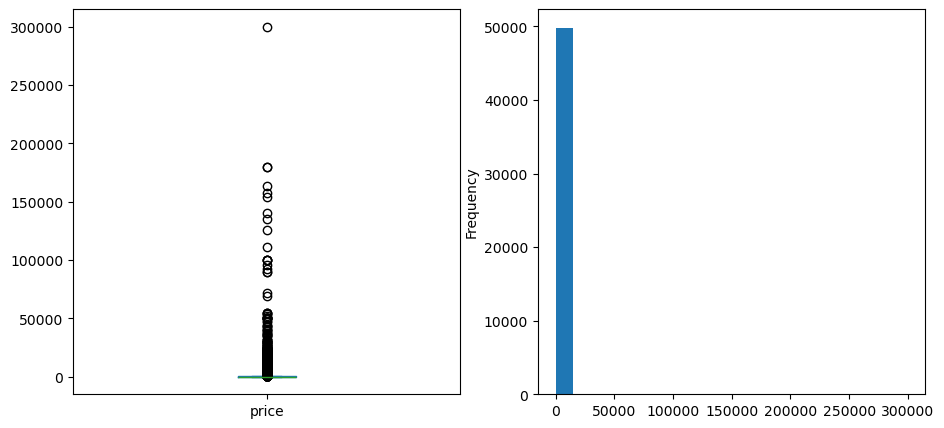

In [38]:
summary(df['price'])

In [39]:
flter = df['price'] < df['price'].quantile(0.75) 
flter

df[flter]['price']

0         53
2        445
3         42
4        300
5        149
        ... 
49994    370
49995     28
49996     33
49998    233
49999     97
Name: price, Length: 37493, dtype: int64

count    37493.000000
mean       142.304430
std        105.832987
min          0.000000
25%         65.000000
50%        100.000000
75%        195.000000
max        470.000000
Name: price, dtype: float64

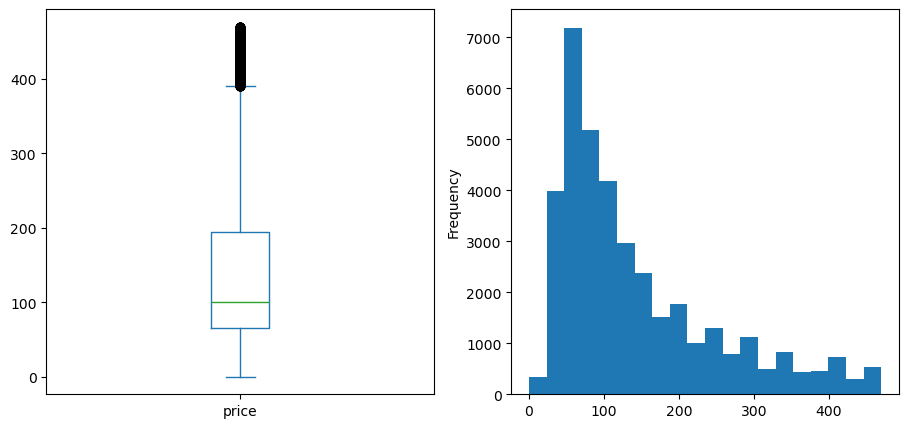

In [40]:
summary(df[flter]['price'])

### 2.1.2 Host performance:
- Analyze the relationship between superhost status and review scores
- Compare response rates and acceptance rates of superhosts vs regular hosts
- Examine how a host's total listing count relates to their performance metrics

### 2.1.3 Review score analysis:
- Calculate average scores for different aspects (cleanliness, location, etc.)
- Identify factors that correlate with high overall ratings
- Compare review scores across different property types or room types

### 2.1.4 Booking patterns:
- Analyze the relationship between minimum/maximum nights and other factors
- Examine how instant bookable status affects pricing or review scores

### 2.1.5 Amenities analysis:
- Identify the most common amenities
- Analyze how certain amenities affect pricing or review scores